<a href="https://colab.research.google.com/github/Prast667/Prit/blob/main/EfficientNet%20%2B%20YOLOv8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="5WRtONakONPDAJs712qi")
project = rf.workspace("tomsoy").project("project-automated-kontolodon-uxw2m")
version = project.version(10)
dataset = version.download("yolov8")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 71.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 75.9 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.11
    Uninstalling idna-3.11:
      Successfully uninstalled idna-3.11
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Project-Automated-Kontolodon-10 in yolov8:: 100%|██████████| 76938/76938 [00:11<00:00, 6744.88it/s] 


In [ ]:
!nvidia-smi


Fri Dec 19 20:52:39 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   46C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
!pip install ultralytics tensorflow opencv-python scikit-learn


Train YOLOv8 Model for Bounding Box Generation


In [ ]:
from ultralytics import YOLO

model_yolo = YOLO("yolov8n.pt")

model_yolo.train(
    data="/content/Project-Automated-Kontolodon-10/data.yaml",
    epochs=20,
    imgsz=640,
    batch=26
)


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.240 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=26, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Project-Automated-Kontolodon-10/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=F

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f7a7e8571a0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0

Evaluate YOLOv8 Detection Performance


In [ ]:
from ultralytics import YOLO

model = YOLO("runs/detect/train/weights/best.pt")


In [ ]:
DATASET_ROOT = "/content/Project-Automated-Kontolodon-10"

CLASS_NAMES = ['Organik', 'Anorganik', 'Metal', 'B3']


Generate Object-Level Waste Images via YOLO-Based Cropping


In [ ]:
import os
import cv2

DATASET_ROOT = "/content/Project-Automated-Kontolodon-10"
CLASS_NAMES = ['Organik', 'Anorganik', 'Metal', 'B3']

def crop_dataset(split):
    img_dir = f"{DATASET_ROOT}/{split}/images"
    lbl_dir = f"{DATASET_ROOT}/{split}/labels"
    out_dir = f"/content/dataset_cls/{split}"

    os.makedirs(out_dir, exist_ok=True)
    for c in CLASS_NAMES:
        os.makedirs(os.path.join(out_dir, c), exist_ok=True)

    for img_name in os.listdir(img_dir):
        img_path = os.path.join(img_dir, img_name)
        lbl_path = os.path.join(lbl_dir, img_name.replace(".jpg", ".txt"))

        if not os.path.exists(lbl_path):
            continue

        img = cv2.imread(img_path)
        if img is None:
            continue

        h, w, _ = img.shape

        with open(lbl_path) as f:
            for i, line in enumerate(f):
                values = list(map(float, line.split()))
                cls, x, y, bw, bh = values[:5]

                x1 = int((x - bw/2) * w)
                y1 = int((y - bh/2) * h)
                x2 = int((x + bw/2) * w)
                y2 = int((y + bh/2) * h)

                crop = img[y1:y2, x1:x2]
                if crop.size == 0:
                    continue

                cls_name = CLASS_NAMES[int(cls)]
                save_path = f"{out_dir}/{cls_name}/{img_name}_{i}.jpg"
                cv2.imwrite(save_path, crop)

for split in ["train", "valid", "test"]:
    crop_dataset(split)


Prepare Object-Level Dataset for Classification


In [ ]:
import tensorflow as tf

IMG_SIZE = (224, 224)
BATCH_SIZE = 32

BASE_PATH = "/content/dataset_cls"

train_ds = tf.keras.utils.image_dataset_from_directory(
    f"{BASE_PATH}/train",
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    f"{BASE_PATH}/valid",
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    f"{BASE_PATH}/test",
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=False
)


Found 72720 files belonging to 4 classes.
Found 4853 files belonging to 4 classes.
Found 5283 files belonging to 4 classes.


In [ ]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model


Load Object-Level Dataset for Classification


In [ ]:
from tensorflow.keras.applications import EfficientNetB0

base_model = EfficientNetB0(
    weights="imagenet",
    include_top=False,
    input_shape=(224, 224, 3)
)

base_model.trainable = False


16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
outputs = Dense(4, activation="softmax")(x)

model = Model(inputs=base_model.input, outputs=outputs)


In [ ]:
import tensorflow as tf

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint(
    filepath="/content/drive/MyDrive/efficientnet_ckpt.h5",
    monitor="val_loss",
    save_best_only=True,
    verbose=1
)


Train EfficientNet-B0 (Frozen Backbone)


In [ ]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20,
    callbacks=[checkpoint]
)


Epoch 1/20
2273/2273 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.6707 - loss: 0.8364
Epoch 1: val_loss improved from inf to 0.41937, saving model to /content/drive/MyDrive/efficientnet_ckpt.h5


2273/2273 ━━━━━━━━━━━━━━━━━━━━ 134s 59ms/step - accuracy: 0.6707 - loss: 0.8363 - val_accuracy: 0.8628 - val_loss: 0.4194
Epoch 2/20
2273/2273 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.8368 - loss: 0.4641
Epoch 2: val_loss improved from 0.41937 to 0.36140, saving model to /content/drive/MyDrive/efficientnet_ckpt.h5


2273/2273 ━━━━━━━━━━━━━━━━━━━━ 88s 39ms/step - accuracy: 0.8368 - loss: 0.4641 - val_accuracy: 0.8786 - val_loss: 0.3614
Epoch 3/20
2271/2273 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.8551 - loss: 0.4156
Epoch 3: val_loss improved from 0.36140 to 0.33860, saving model to /content/drive/MyDrive/efficientnet_ckpt.h5


2273/2273 ━━━━━━━━━━━━━━━━━━━━ 141s 38ms/step - accuracy: 0.8551 - loss: 0.4156 - val_accuracy: 0.8850 - val_loss: 0.3386
Epoch 4/20
2271/2273 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.8639 - loss: 0.3929
Epoch 4: val_loss improved from 0.33860 to 0.32456, saving model to /content/drive/MyDrive/efficientnet_ckpt.h5


2273/2273 ━━━━━━━━━━━━━━━━━━━━ 142s 38ms/step - accuracy: 0.8639 - loss: 0.3929 - val_accuracy: 0.8906 - val_loss: 0.3246
Epoch 5/20
2272/2273 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.8683 - loss: 0.3802
Epoch 5: val_loss improved from 0.32456 to 0.31611, saving model to /content/drive/MyDrive/efficientnet_ckpt.h5


2273/2273 ━━━━━━━━━━━━━━━━━━━━ 87s 38ms/step - accuracy: 0.8683 - loss: 0.3802 - val_accuracy: 0.8943 - val_loss: 0.3161
Epoch 6/20
2273/2273 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.8710 - loss: 0.3710
Epoch 6: val_loss improved from 0.31611 to 0.30967, saving model to /content/drive/MyDrive/efficientnet_ckpt.h5


2273/2273 ━━━━━━━━━━━━━━━━━━━━ 142s 38ms/step - accuracy: 0.8710 - loss: 0.3710 - val_accuracy: 0.8955 - val_loss: 0.3097
Epoch 7/20
2271/2273 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.8743 - loss: 0.3625
Epoch 7: val_loss improved from 0.30967 to 0.30381, saving model to /content/drive/MyDrive/efficientnet_ckpt.h5


2273/2273 ━━━━━━━━━━━━━━━━━━━━ 147s 40ms/step - accuracy: 0.8744 - loss: 0.3625 - val_accuracy: 0.8972 - val_loss: 0.3038
Epoch 8/20
2272/2273 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.8748 - loss: 0.3623
Epoch 8: val_loss improved from 0.30381 to 0.30097, saving model to /content/drive/MyDrive/efficientnet_ckpt.h5


2273/2273 ━━━━━━━━━━━━━━━━━━━━ 137s 38ms/step - accuracy: 0.8748 - loss: 0.3623 - val_accuracy: 0.8986 - val_loss: 0.3010
Epoch 9/20
2273/2273 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.8771 - loss: 0.3552
Epoch 9: val_loss improved from 0.30097 to 0.29836, saving model to /content/drive/MyDrive/efficientnet_ckpt.h5


2273/2273 ━━━━━━━━━━━━━━━━━━━━ 143s 38ms/step - accuracy: 0.8771 - loss: 0.3552 - val_accuracy: 0.8996 - val_loss: 0.2984
Epoch 10/20
2271/2273 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.8760 - loss: 0.3504
Epoch 10: val_loss improved from 0.29836 to 0.29376, saving model to /content/drive/MyDrive/efficientnet_ckpt.h5


2273/2273 ━━━━━━━━━━━━━━━━━━━━ 87s 38ms/step - accuracy: 0.8760 - loss: 0.3504 - val_accuracy: 0.9023 - val_loss: 0.2938
Epoch 11/20
2272/2273 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.8780 - loss: 0.3483
Epoch 11: val_loss improved from 0.29376 to 0.29242, saving model to /content/drive/MyDrive/efficientnet_ckpt.h5


2273/2273 ━━━━━━━━━━━━━━━━━━━━ 87s 38ms/step - accuracy: 0.8780 - loss: 0.3483 - val_accuracy: 0.9025 - val_loss: 0.2924
Epoch 12/20
2273/2273 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.8765 - loss: 0.3492
Epoch 12: val_loss improved from 0.29242 to 0.29150, saving model to /content/drive/MyDrive/efficientnet_ckpt.h5


2273/2273 ━━━━━━━━━━━━━━━━━━━━ 86s 38ms/step - accuracy: 0.8765 - loss: 0.3492 - val_accuracy: 0.9023 - val_loss: 0.2915
Epoch 13/20
2272/2273 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.8792 - loss: 0.3437
Epoch 13: val_loss improved from 0.29150 to 0.28949, saving model to /content/drive/MyDrive/efficientnet_ckpt.h5


2273/2273 ━━━━━━━━━━━━━━━━━━━━ 91s 40ms/step - accuracy: 0.8792 - loss: 0.3437 - val_accuracy: 0.9021 - val_loss: 0.2895
Epoch 14/20
2272/2273 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.8786 - loss: 0.3438
Epoch 14: val_loss improved from 0.28949 to 0.28759, saving model to /content/drive/MyDrive/efficientnet_ckpt.h5


2273/2273 ━━━━━━━━━━━━━━━━━━━━ 137s 38ms/step - accuracy: 0.8786 - loss: 0.3438 - val_accuracy: 0.9023 - val_loss: 0.2876
Epoch 15/20
2272/2273 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.8779 - loss: 0.3423
Epoch 15: val_loss improved from 0.28759 to 0.28728, saving model to /content/drive/MyDrive/efficientnet_ckpt.h5


2273/2273 ━━━━━━━━━━━━━━━━━━━━ 87s 38ms/step - accuracy: 0.8779 - loss: 0.3423 - val_accuracy: 0.9042 - val_loss: 0.2873
Epoch 16/20
2272/2273 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.8787 - loss: 0.3390
Epoch 16: val_loss improved from 0.28728 to 0.28676, saving model to /content/drive/MyDrive/efficientnet_ckpt.h5


2273/2273 ━━━━━━━━━━━━━━━━━━━━ 142s 38ms/step - accuracy: 0.8787 - loss: 0.3390 - val_accuracy: 0.9046 - val_loss: 0.2868
Epoch 17/20
2273/2273 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.8797 - loss: 0.3400
Epoch 17: val_loss improved from 0.28676 to 0.28609, saving model to /content/drive/MyDrive/efficientnet_ckpt.h5


2273/2273 ━━━━━━━━━━━━━━━━━━━━ 87s 38ms/step - accuracy: 0.8797 - loss: 0.3400 - val_accuracy: 0.9056 - val_loss: 0.2861
Epoch 18/20
2272/2273 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.8799 - loss: 0.3394
Epoch 18: val_loss improved from 0.28609 to 0.28178, saving model to /content/drive/MyDrive/efficientnet_ckpt.h5


2273/2273 ━━━━━━━━━━━━━━━━━━━━ 146s 40ms/step - accuracy: 0.8799 - loss: 0.3394 - val_accuracy: 0.9054 - val_loss: 0.2818
Epoch 19/20
2273/2273 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.8797 - loss: 0.3396
Epoch 19: val_loss did not improve from 0.28178
2273/2273 ━━━━━━━━━━━━━━━━━━━━ 155s 46ms/step - accuracy: 0.8797 - loss: 0.3396 - val_accuracy: 0.9048 - val_loss: 0.2831
Epoch 20/20
2273/2273 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.8808 - loss: 0.3385
Epoch 20: val_loss did not improve from 0.28178
2273/2273 ━━━━━━━━━━━━━━━━━━━━ 105s 46ms/step - accuracy: 0.8808 - loss: 0.3385 - val_accuracy: 0.9052 - val_loss: 0.2838


Fine-Tune EfficientNet-B0

In [ ]:
base_model.trainable = True

model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-5),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model.fit(train_ds, validation_data=val_ds, epochs=10)


Epoch 1/10
2273/2273 ━━━━━━━━━━━━━━━━━━━━ 493s 171ms/step - accuracy: 0.7533 - loss: 0.6526 - val_accuracy: 0.9069 - val_loss: 0.2820
Epoch 2/10
2273/2273 ━━━━━━━━━━━━━━━━━━━━ 308s 136ms/step - accuracy: 0.8703 - loss: 0.3682 - val_accuracy: 0.9238 - val_loss: 0.2359
Epoch 3/10
2273/2273 ━━━━━━━━━━━━━━━━━━━━ 319s 140ms/step - accuracy: 0.8974 - loss: 0.2919 - val_accuracy: 0.9322 - val_loss: 0.2146
Epoch 4/10
2273/2273 ━━━━━━━━━━━━━━━━━━━━ 317s 139ms/step - accuracy: 0.9147 - loss: 0.2399 - val_accuracy: 0.9382 - val_loss: 0.1999
Epoch 5/10
2273/2273 ━━━━━━━━━━━━━━━━━━━━ 314s 138ms/step - accuracy: 0.9295 - loss: 0.2052 - val_accuracy: 0.9409 - val_loss: 0.1891
Epoch 6/10
2273/2273 ━━━━━━━━━━━━━━━━━━━━ 330s 141ms/step - accuracy: 0.9373 - loss: 0.1805 - val_accuracy: 0.9446 - val_loss: 0.1801
Epoch 7/10
2273/2273 ━━━━━━━━━━━━━━━━━━━━ 320s 141ms/step - accuracy: 0.9456 - loss: 0.1575 - val_accuracy: 0.9440 - val_loss: 0.1752
Epoch 8/10
2273/2273 ━━━━━━━━━━━━━━━━━━━━ 323s 142ms/step - ac

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix


Evaluate Classification Performance


In [ ]:
y_true = np.concatenate([y for x, y in test_ds], axis=0)
y_pred = np.argmax(model.predict(test_ds), axis=1)


166/166 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step


In [ ]:
print(classification_report(y_true, y_pred))
print(confusion_matrix(y_true, y_pred))


              precision    recall  f1-score   support

           0       0.94      0.96      0.95       799
           1       0.96      0.97      0.96      1944
           2       0.96      0.94      0.95      1720
           3       0.96      0.94      0.95       820

    accuracy                           0.95      5283
   macro avg       0.95      0.95      0.95      5283
weighted avg       0.95      0.95      0.95      5283

[[ 768    9   16    6]
 [   6 1882   41   15]
 [  33   56 1623    8]
 [  14   16   19  771]]


In [ ]:
import numpy as np

y_true = np.concatenate([y.numpy() for x, y in test_ds], axis=0)
y_pred = np.argmax(model.predict(test_ds), axis=1)


166/166 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step


In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true, y_pred)
print(cm)


[[ 768    9   16    6]
 [   6 1882   41   15]
 [  33   56 1623    8]
 [  14   16   19  771]]


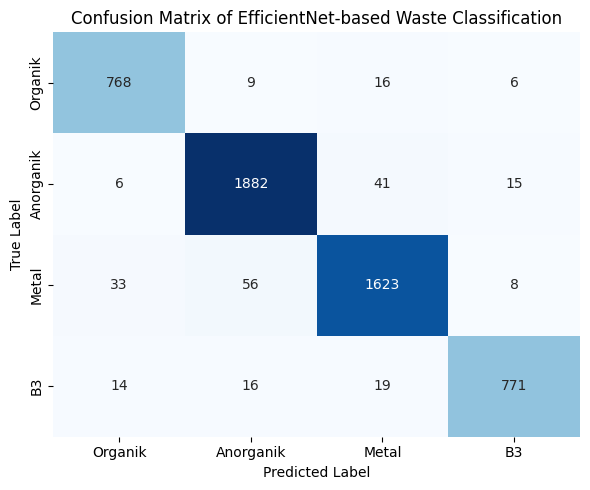

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 5))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=CLASS_NAMES,
    yticklabels=CLASS_NAMES,
    cbar=False
)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix of EfficientNet-based Waste Classification")
plt.tight_layout()
plt.show()


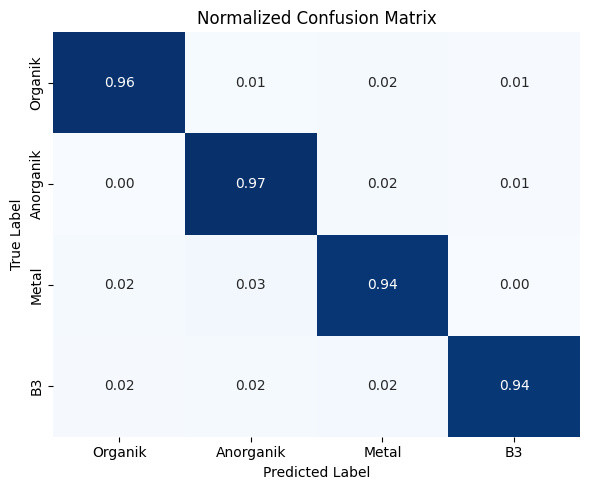

In [ ]:
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(6, 5))
sns.heatmap(
    cm_norm,
    annot=True,
    fmt='.2f',
    cmap='Blues',
    xticklabels=CLASS_NAMES,
    yticklabels=CLASS_NAMES,
    cbar=False
)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Normalized Confusion Matrix")
plt.tight_layout()
plt.show()


In [ ]:
import os

def count_class_samples(base_dir):
    counts = {}
    for cls in CLASS_NAMES:
        cls_path = os.path.join(base_dir, cls)
        counts[cls] = len(os.listdir(cls_path))
    return counts

train_counts = count_class_samples("dataset_cls/train")
val_counts   = count_class_samples("dataset_cls/valid")
test_counts  = count_class_samples("dataset_cls/test")

print("Train:", train_counts)
print("Validation:", val_counts)
print("Test:", test_counts)


Train: {'Organik': 11007, 'Anorganik': 16542, 'Metal': 17572, 'B3': 27599}
Validation: {'Organik': 799, 'Anorganik': 986, 'Metal': 800, 'B3': 2268}
Test: {'Organik': 820, 'Anorganik': 799, 'Metal': 1720, 'B3': 1944}


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(
    y_true,
    y_pred,
    target_names=CLASS_NAMES,
    digits=4
))


              precision    recall  f1-score   support

     Organik     0.9354    0.9612    0.9481       799
   Anorganik     0.9587    0.9681    0.9634      1944
       Metal     0.9553    0.9436    0.9494      1720
          B3     0.9637    0.9402    0.9519       820

    accuracy                         0.9548      5283
   macro avg     0.9533    0.9533    0.9532      5283
weighted avg     0.9549    0.9548    0.9547      5283

